In [18]:
#INITIALIZING

import pandas as pd

metadata = pd.read_csv("sample_info.csv")

drug_sensitivity = pd.read_excel("GDSC2_fitted_dose_response_25Feb20.xlsx")

In [19]:
expression_data = pd.read_csv('CCLE_expression.csv', header=0)
expression_data.columns.values[0] = 'DEPMAP_ID' 

In [20]:
expression_data.columns = expression_data.columns.str.upper()
metadata.columns = metadata.columns.str.upper()
drug_sensitivity.columns = drug_sensitivity.columns.str.upper()

In [21]:
metadata.shape


(1829, 22)

In [22]:
metadata

,DEPMAP_ID,CELL_LINE_NAME,STRIPPED_CELL_LINE_NAME,CCLE_NAME,ALIAS,COSMICID,SEX,SOURCE,RRID,WTSI_MASTER_CELL_ID,...,PRIMARY_DISEASE,SUBTYPE,AGE,SANGER_MODEL_ID,DEPMAP_PUBLIC_COMMENTS,LINEAGE,LINEAGE_SUBTYPE,LINEAGE_SUB_SUBTYPE,LINEAGE_MOLECULAR_SUBTYPE,CULTURE_TYPE
0,ACH-000001,NIH:OVCAR-3,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,CVCL_0465,2201.0,...,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN,Adherent
1,ACH-000002,HL-60,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,CVCL_0002,55.0,...,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN,Suspension
2,ACH-000003,CACO2,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,CVCL_0025,NaN,...,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN,not found
3,ACH-000004,HEL,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,CVCL_0001,783.0,...,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN,Suspension
4,ACH-000005,HEL 92.1.7,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,CVCL_2481,NaN,...,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN,Suspension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,ACH-002659,JVE-127,JVE127,JVE127_COLON,NaN,NaN,Male,DSMZ,NaN,NaN,...,Colon/Colorectal Cancer,Adenocarcinoma,60.0,NaN,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN,Adherent
1825,ACH-002687,WM3772F,WM3772F,WM3772F_EYE,NaN,NaN,Female,"Rockland Immunochemicals, Inc.",NaN,NaN,...,Eye Cancer,Uveal Melanoma,NaN,NaN,NaN,eye,uveal_melanoma,NaN,NaN,Adherent
1826,ACH-002800,NCC-MPNST2-C1,NCCMPNST2C1,NaN,NaN,NaN,Unknown,Academic lab,NaN,NaN,...,Sarcoma,MPNST,NaN,NaN,Patient-derived model,peripheral_nervous_system,MPNST,NaN,NaN,Adherent
1827,ACH-002874,A375_RPMI,A375RPMI,NaN,NaN,NaN,Female,ATCC,NaN,NaN,...,Skin Cancer,Melanoma,54.0,NaN,NaN,skin,NaN,NaN,NaN,not found


In [23]:

total_cell_lines = metadata["CELL_LINE_NAME"].shape[0]


unique_cell_lines = metadata["CELL_LINE_NAME"].nunique()


In [24]:
total_cell_lines

1829

In [25]:
unique_cell_lines

1735

In [26]:
sample_site_df = metadata["SAMPLE_COLLECTION_SITE"].unique()
sample_site_df_count = sample_site_df.shape[0]
sample_sites = pd.Series(sample_site_df).tolist()

In [27]:
sample_site_df


array(['ascites', 'haematopoietic_and_lymphoid_tissue', 'Colon',
       'bone_marrow', 'large_intestine', 'skin', 'lymph_node', 'lung',
       'kidney', 'pleural_effusion', 'urinary_tract', 'liver',
       'central_nervous_system', 'pancreas', 'soft_tissue', 'bone',
       'fibroblast', 'ovary', 'abdomen', 'thyroid', 'autonomic_ganglia',
       'pleura', 'stomach', 'breast', 'cervix', 'biliary_tract', 'spleen',
       'prostate', 'endometrium', 'upper_aerodigestive_tract',
       'oesophagus', 'pericardial_effusion', 'small_intestine',
       'salivary_gland', 'engineered', 'Embryonal', 'eye', 'uvea',
       'Placenta', 'Testes', '-1', 'matched_normal_tissue', 'Unknown'],
      dtype=object)

In [28]:
gender = metadata['SEX'].value_counts()
gender

SEX
Male       770
Female     614
Unknown    445
Name: count, dtype: int64

In [29]:
males = gender['Male']
females = gender['Female']
unknowngender = ['Unknown']

In [30]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 120]  # Upper limit set to 120 to cover ages >80
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']
metadata['AGE_GROUP'] = pd.cut(metadata['AGE'], bins=age_bins, labels=age_labels, right=True)

In [31]:
age_group_counts = metadata['AGE_GROUP'].value_counts().sort_index()

In [32]:
age_group_counts

AGE_GROUP
1-10      83
11-20     66
21-30     54
31-40     86
41-50    170
51-60    238
61-70    233
71-80     98
>80       16
Name: count, dtype: int64

In [33]:
primary_diseasedf = metadata["PRIMARY_DISEASE"].unique()
primary_diseasedf_count = primary_diseasedf.shape[0]
primary_diseases = pd.Series(primary_diseasedf).tolist()

In [34]:
primary_cancer_samples = metadata['PRIMARY_OR_METASTASIS'] == 'Primary'

In [35]:
metastatic_cancer_samples = metadata['PRIMARY_OR_METASTASIS'] == 'Metastasis'

In [36]:
count_samples = metadata['PRIMARY_OR_METASTASIS'].value_counts()

In [37]:
count_samples

PRIMARY_OR_METASTASIS
Primary       664
Metastasis    505
Unknown         1
Name: count, dtype: int64

In [38]:
primary_diseasedf

array(['Ovarian Cancer', 'Leukemia', 'Colon/Colorectal Cancer',
       'Skin Cancer', 'Bladder Cancer', 'Lung Cancer', 'Kidney Cancer',
       'Breast Cancer', 'Pancreatic Cancer', 'Myeloma', 'Brain Cancer',
       'Sarcoma', 'Lymphoma', 'Bone Cancer', 'Fibroblast',
       'Gastric Cancer', 'Engineered', 'Thyroid Cancer', 'Neuroblastoma',
       'Prostate Cancer', 'Rhabdoid', 'Gallbladder Cancer',
       'Endometrial/Uterine Cancer', 'Head and Neck Cancer',
       'Bile Duct Cancer', 'Esophageal Cancer', 'Liver Cancer',
       'Cervical Cancer', 'Unknown', 'Eye Cancer', 'Adrenal Cancer',
       'Liposarcoma', 'Embryonal Cancer', 'Teratoma', 'Non-Cancerous'],
      dtype=object)

In [39]:
tissue_counts = metadata['PRIMARY_DISEASE'].value_counts()

C:\Users\dimim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dimim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


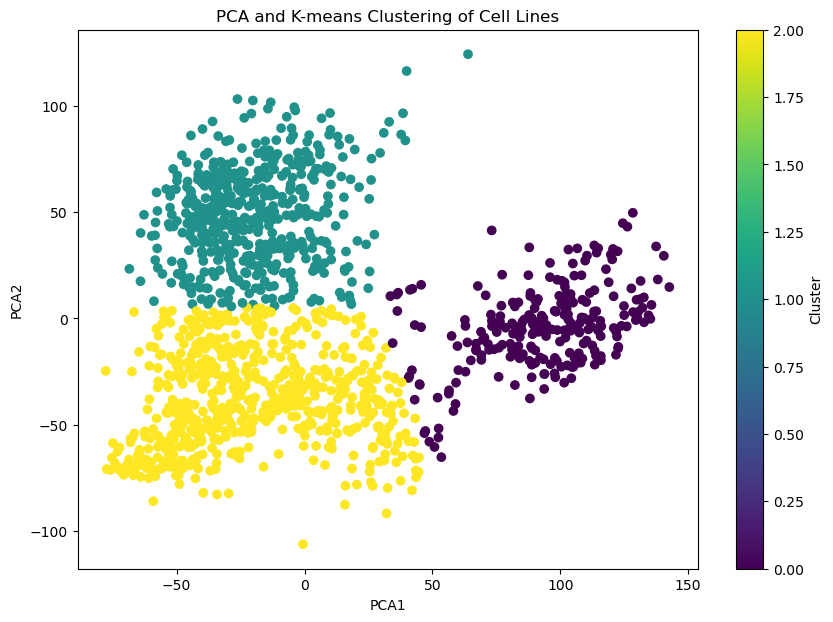

In [40]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# I drop the identifier
expression_values = expression_data.drop(columns=['DEPMAP_ID'])

# PCA for dimension reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(expression_values)

# Add PCA results back to the DataFrame
expression_data['PCA1'] = pca_result[:, 0]
expression_data['PCA2'] = pca_result[:, 1]

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
expression_data['Cluster'] = kmeans.fit_predict(pca_result)

# Plot PCA and clusters
plt.figure(figsize=(10, 7))
plt.scatter(expression_data['PCA1'], expression_data['PCA2'], c=expression_data['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA and K-means Clustering of Cell Lines')
plt.colorbar(label='Cluster')
plt.savefig("pca and k means of cell lines1.jpg")
plt.show()



In [41]:
pca_result


array([[-19.06403705,  -4.48230732],
       [ 17.6521048 , -53.33677543],
       [-20.36555957, -39.74438253],
       ...,
       [-57.87531681,  -4.78464471],
       [-33.13658105,  68.28752171],
       [ 10.45291583, -57.9117039 ]])

In [42]:
merged_data = expression_data.merge(metadata, on='DEPMAP_ID', how='left')


In [43]:
merged_data.head

<bound method NDFrame.head of        DEPMAP_ID  TSPAN6 (7105)  TNMD (64102)  DPM1 (8813)  SCYL3 (57147)  \
0     ACH-001113       4.990501      0.000000     7.273702       2.765535   
1     ACH-001289       5.209843      0.545968     7.070604       2.538538   
2     ACH-001339       3.779260      0.000000     7.346425       2.339137   
3     ACH-001538       5.726831      0.000000     7.086189       2.543496   
4     ACH-000242       7.465648      0.000000     6.435462       2.414136   
...          ...            ...           ...          ...            ...   
1388  ACH-000750       4.173127      0.000000     6.400879       1.807355   
1389  ACH-000285       0.097611      0.000000     6.428276       3.257011   
1390  ACH-001858       5.045268      0.000000     6.991749       1.807355   
1391  ACH-001997       5.805292      0.000000     7.792855       2.482848   
1392  ACH-000052       4.870858      0.000000     6.077457       2.304511   

      C1ORF112 (55732)  FGR (2268)  CFH (3075

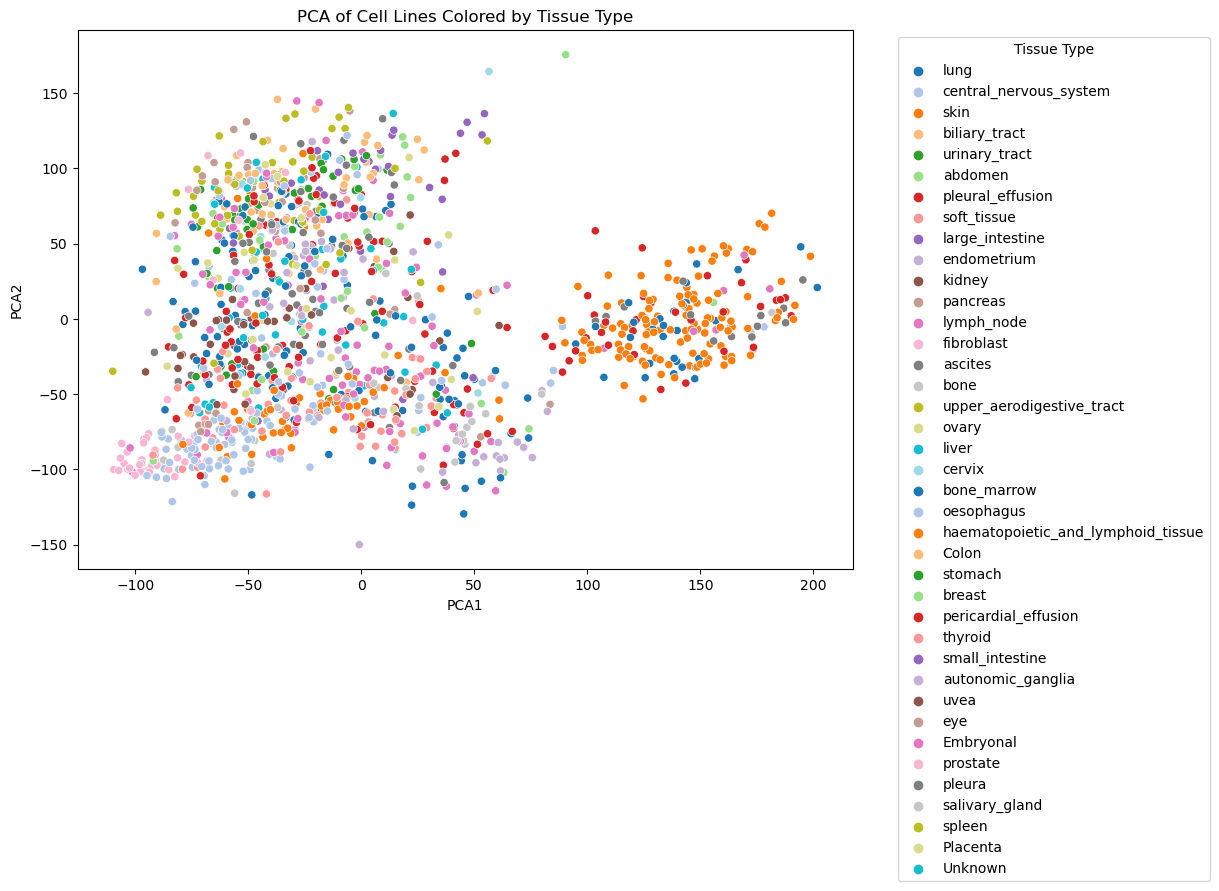

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Merge sample info to include tissue type
merged_data = expression_data.merge(metadata[['DEPMAP_ID', 'SAMPLE_COLLECTION_SITE']], left_on='DEPMAP_ID', right_on='DEPMAP_ID')

# Drop identifier column for PCA
expression_values = merged_data.drop(columns=['DEPMAP_ID', 'SAMPLE_COLLECTION_SITE'])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(expression_values)

# PCA results and tissue type back to the DataFrame
merged_data['PCA1'] = pca_result[:, 0]
merged_data['PCA2'] = pca_result[:, 1]

# Plot PCA with tissue types
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='SAMPLE_COLLECTION_SITE', data=merged_data, palette='tab20', legend='full')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of Cell Lines Colored by Tissue Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Tissue Type')
plt.savefig("pca tissue type1.jpg")
plt.show()


PCA explained variance


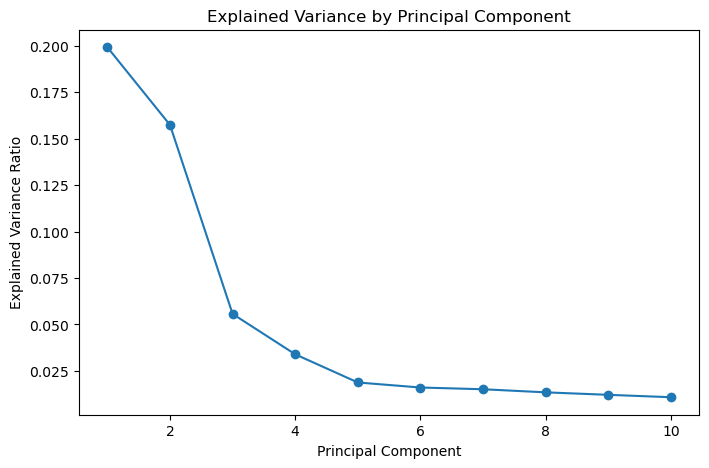

Cumulative explained variance by component: [0.19930291 0.35676807 0.41241089 0.44630313 0.46501217 0.48101457
 0.49607856 0.50947668 0.52153871 0.53231143]


In [45]:
# Calculate explained variance for each PCA component
pca = PCA(n_components=10)  
pca.fit(expression_values)  # Use the original gene expression data without 'DEPMAP_ID'

explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()

cumulative_variance = explained_variance.cumsum()
print("Cumulative explained variance by component:", cumulative_variance)


In [46]:

components_df = pd.DataFrame(pca.components_, columns=expression_values.columns)

# Finding top genes contributing to PC1 and PC2
top_genes_pc1 = components_df.iloc[0].nlargest(10)  # Top 10 genes for PC1
top_genes_pc2 = components_df.iloc[1].nlargest(10)  # Top 10 genes for PC2

print("Top genes contributing to PC1:\n", top_genes_pc1)
print("Top genes contributing to PC2:\n", top_genes_pc2)


Top genes contributing to PC1:
 PCA1              0.707089
CORO1A (11151)    0.027493
CD53 (963)        0.026781
GMFG (9535)       0.026719
HCLS1 (3059)      0.024996
IRAG2 (4033)      0.024759
PTPN7 (5778)      0.024008
MZB1 (51237)      0.023705
CD48 (962)        0.023533
WAS (7454)        0.023379
Name: 0, dtype: float64
Top genes contributing to PC2:
 PCA2                0.707095
S100A14 (57402)     0.042335
KRT19 (3880)        0.040897
C19ORF33 (64073)    0.040539
FXYD3 (5349)        0.040306
EPCAM (4072)        0.039541
ELF3 (1999)         0.038265
LCN2 (3934)         0.037936
SLPI (6590)         0.037776
TACSTD2 (4070)      0.037504
Name: 1, dtype: float64


In [47]:
import matplotlib.pyplot as plt

# Count values for each category
tissue_counts = metadata['PRIMARY_DISEASE'].value_counts()
gender_counts = metadata['SEX'].value_counts()
cancer_type_counts = metadata['PRIMARY_OR_METASTASIS'].value_counts() 
age_groups_counts = pd.cut(metadata['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100]).value_counts()



C:\Users\dimim\AppData\Local\Temp\ipykernel_17504\3455664511.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(tissue_counts.index, rotation=90)
C:\Users\dimim\AppData\Local\Temp\ipykernel_17504\3455664511.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(gender_counts.index, rotation=0)
C:\Users\dimim\AppData\Local\Temp\ipykernel_17504\3455664511.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(cancer_type_counts.index, rotation=0)
C:\Users\dimim\AppData\Local\Temp\ipykernel_17504\3455664511.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xtickla

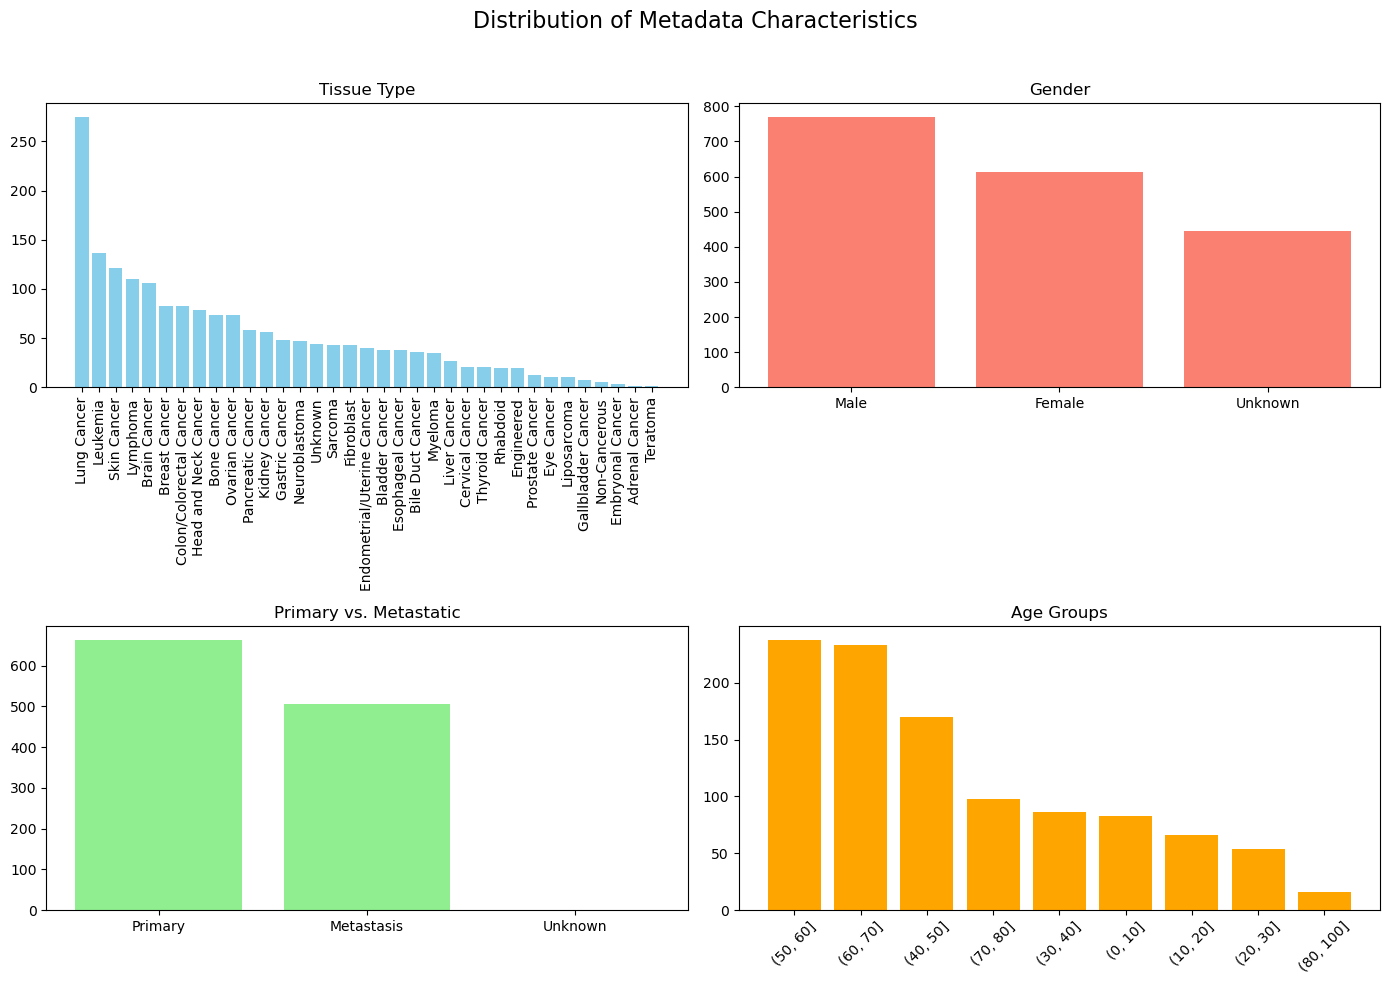

In [48]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Adjust as needed based on the number of categories
fig.suptitle('Distribution of Metadata Characteristics', fontsize=16)

# Tissue Type
axes[0, 0].bar(tissue_counts.index, tissue_counts.values, color='skyblue')
axes[0, 0].set_title('Tissue Type')
axes[0, 0].set_xticklabels(tissue_counts.index, rotation=90)

# Gender
axes[0, 1].bar(gender_counts.index, gender_counts.values, color='salmon')
axes[0, 1].set_title('Gender')
axes[0, 1].set_xticklabels(gender_counts.index, rotation=0)

# Primary vs. Metastatic (Growth properties)
axes[1, 0].bar(cancer_type_counts.index, cancer_type_counts.values, color='lightgreen')
axes[1, 0].set_title('Primary vs. Metastatic')
axes[1, 0].set_xticklabels(cancer_type_counts.index, rotation=0)

# Age Groups
axes[1, 1].bar(age_groups_counts.index.astype(str), age_groups_counts.values, color='orange')
axes[1, 1].set_title('Age Groups')
axes[1, 1].set_xticklabels(age_groups_counts.index.astype(str), rotation=45)

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjusts spacing to fit title
plt.show()


In [49]:
expression_data.rename(columns={expression_data.columns[0]: 'DEPMAP_ID'}, inplace=True)

In [50]:
expression_data

,DEPMAP_ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1ORF112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,AL160269.1 (11046),ABCF2-H2BE1 (114483834),POLR2J3 (548644),H2BE1 (114483833),AL445238.1 (647264),GET1-SH3BGR (106865373),AC113348.1 (102724657),PCA1,PCA2,Cluster
0,ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,...,0.150560,1.427606,5.781884,0.000000,0.000000,0.799087,0.000000,-19.064037,-4.482307,2
1,ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,...,0.000000,0.807355,4.704319,0.000000,0.000000,0.464668,0.070389,17.652105,-53.336775,2
2,ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,...,0.042644,1.384050,4.931683,0.000000,0.028569,0.263034,0.000000,-20.365560,-39.744383,2
3,ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,...,2.485427,0.713696,3.858976,0.000000,0.000000,0.000000,0.000000,-26.461035,65.962479,1
4,ACH-000242,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,0.000000,1.117695,4.990501,0.000000,0.000000,0.000000,0.000000,-12.286414,52.901974,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,ACH-000750,4.173127,0.000000,6.400879,1.807355,3.303050,0.014355,0.137504,4.944858,4.528571,...,0.000000,2.615887,5.102658,0.000000,0.097611,0.214125,0.000000,-5.883225,-31.139080,2
1389,ACH-000285,0.097611,0.000000,6.428276,3.257011,4.980482,0.411426,0.124328,0.704872,4.829342,...,0.000000,3.326250,6.341630,0.000000,0.000000,0.310340,0.000000,115.890362,-19.596383,0
1390,ACH-001858,5.045268,0.000000,6.991749,1.807355,3.270529,0.028569,3.333424,6.819796,5.395063,...,0.286881,1.925999,4.607626,0.111031,0.000000,1.090853,0.000000,-57.875317,-4.784645,2
1391,ACH-001997,5.805292,0.000000,7.792855,2.482848,3.903038,0.028569,4.124328,6.816600,4.458119,...,0.111031,0.613532,4.787119,0.000000,0.163499,0.084064,0.000000,-33.136581,68.287522,1


# ** PCA INITIALIZATION**

In [51]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

merged_data = pd.merge(expression_data, metadata, on="DEPMAP_ID", how="inner")

primary_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Primary']
metastatic_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Metastasis']

# Only numeric columns (gene expression values) for PCA
primary_data = primary_samples.select_dtypes(include=['float64', 'int64']).copy()
metastatic_data = metastatic_samples.select_dtypes(include=['float64', 'int64']).copy()

# Combine primary and metastatic data
pca_data = pd.concat([primary_data, metastatic_data], axis=0)

# Drop genes (columns) with more than 50% NaN values
threshold = len(pca_data) * 0.5  # 50% of the number of rows
pca_data_cleaned = pca_data.dropna(thresh=threshold, axis=1)

# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data_cleaned)

# Scaled data back to DataFrame for easier manipulation
scaled_data_df = pd.DataFrame(scaled_data, index=pca_data_cleaned.index, columns=pca_data_cleaned.columns)

# Checking for missing values
if scaled_data_df.isnull().values.any():
    print("Warning: Missing values found in the scaled data after cleaning.")
else:
    # PCA on cleaned and scaled data
    pca = PCA(n_components=2)  # Choosing 2 components for a 2D plot
    principal_components = pca.fit_transform(scaled_data_df)

    
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    
    pca_df['PRIMARY_OR_METASTASIS'] = ['Primary'] * len(primary_samples) + ['Metastasis'] * len(metastatic_samples)
    pca_df['PRIMARY_OR_METASTASIS'] = pca_df['PRIMARY_OR_METASTASIS'][:len(scaled_data_df)]  

    
    plt.figure(figsize=(10, 8))
    for cancer_type in pca_df['PRIMARY_OR_METASTASIS'].unique():
        subset = pca_df[pca_df['PRIMARY_OR_METASTASIS'] == cancer_type]
        plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, alpha=0.7)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Gene Expression Data (Primary vs. Metastatic)')
    plt.legend()
    plt.show()

# ** TRIAL 3 **

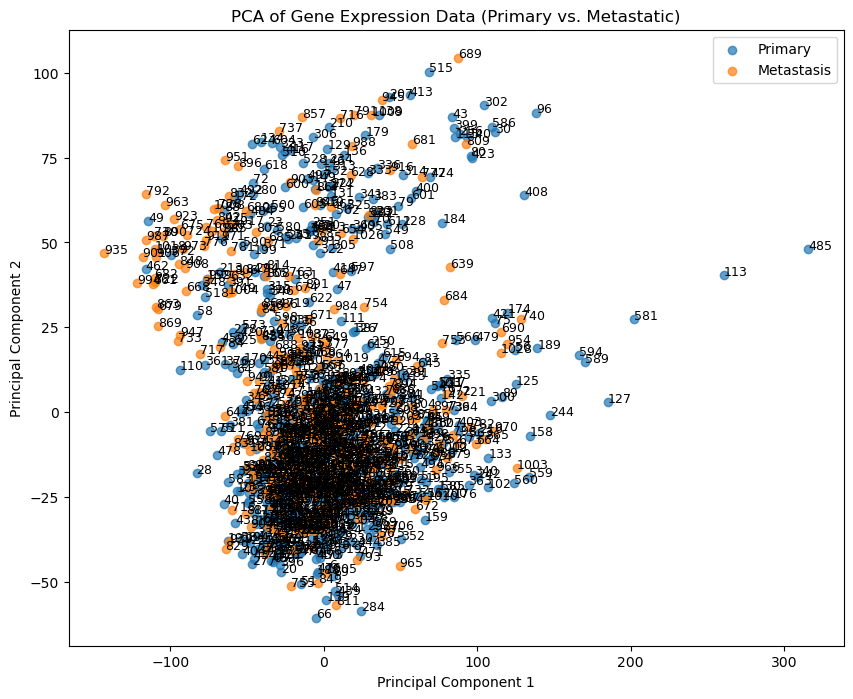

In [52]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


merged_data = pd.merge(expression_data, metadata, on="DEPMAP_ID", how="inner")

primary_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Primary']
metastatic_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Metastasis']

# Only numeric columns (gene expression values) for PCA
primary_data = primary_samples.select_dtypes(include=['float64', 'int64']).copy()
metastatic_data = metastatic_samples.select_dtypes(include=['float64', 'int64']).copy()

# Combine primary and metastatic data
pca_data = pd.concat([primary_data, metastatic_data], axis=0)

# Dropping genes (columns) with more than 50% NaN values
threshold = len(pca_data) * 0.5  # 50% of the number of rows
pca_data_cleaned = pca_data.dropna(thresh=threshold, axis=1)

# Mean imputation
imputer = SimpleImputer(strategy='mean')
pca_data_imputed = imputer.fit_transform(pca_data_cleaned)

# Converting imputed data back to DataFrame for easier manipulation
pca_data_imputed_df = pd.DataFrame(pca_data_imputed, index=pca_data_cleaned.index, columns=pca_data_cleaned.columns)

# Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data_imputed_df)


scaled_data_df = pd.DataFrame(scaled_data, index=pca_data_imputed_df.index, columns=pca_data_imputed_df.columns)

# PCA on cleaned and scaled data
pca = PCA(n_components=2)  # Choosing 2 components for a 2D plot
principal_components = pca.fit_transform(scaled_data_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['PRIMARY_OR_METASTASIS'] = ['Primary'] * len(primary_samples) + ['Metastasis'] * len(metastatic_samples)
pca_df['PRIMARY_OR_METASTASIS'] = pca_df['PRIMARY_OR_METASTASIS'][:len(scaled_data_df)]  # Ensure correct length


plt.figure(figsize=(10, 8))
for cancer_type in pca_df['PRIMARY_OR_METASTASIS'].unique():
    subset = pca_df[pca_df['PRIMARY_OR_METASTASIS'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, alpha=0.7)


for i, row in pca_df.iterrows():
    plt.text(row['PC1'], row['PC2'], str(row.name), fontsize=9)  # Use row.name or any identifier

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data (Primary vs. Metastatic)')
plt.legend()
plt.show()

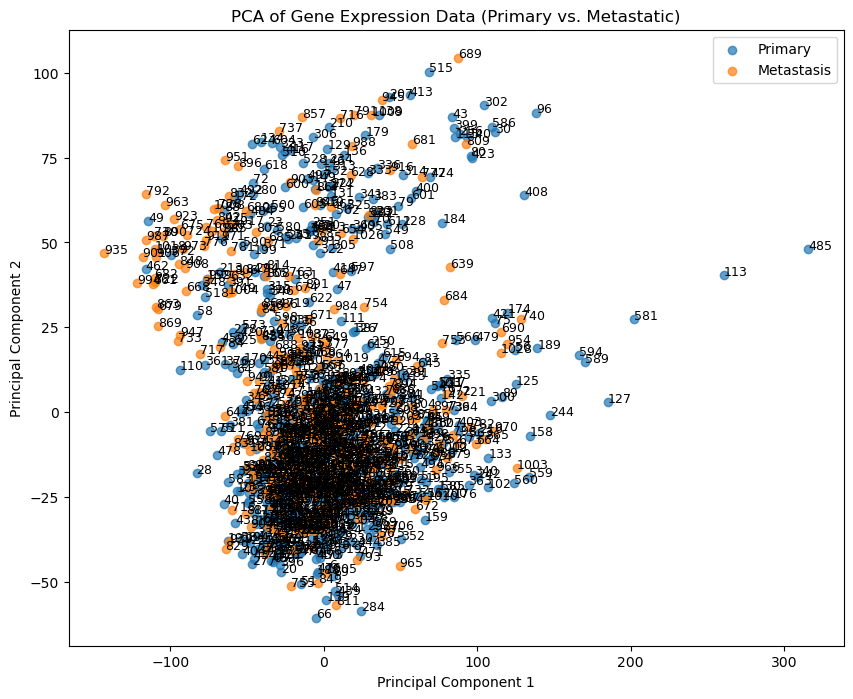

In [53]:

plt.figure(figsize=(10, 8))
for cancer_type in pca_df['PRIMARY_OR_METASTASIS'].unique():
    subset = pca_df[pca_df['PRIMARY_OR_METASTASIS'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, alpha=0.7)

# Adding labels to each point
for i, row in pca_df.iterrows():
    plt.text(row['PC1'], row['PC2'], str(row.name), fontsize=9)  # Use row.name or any identifier

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data (Primary vs. Metastatic)')
plt.legend()
plt.savefig("pca_plot.png", dpi=300, bbox_inches='tight')
plt.show()


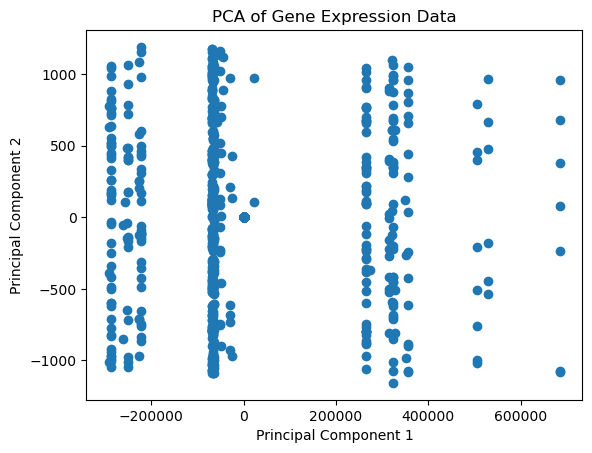

In [54]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pca_data_imputed_df)

plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig("pca_plot22222.png", dpi=300, bbox_inches='tight')
plt.show()

In [55]:
merged_data['PRIMARY_OR_METASTASIS']

0          Primary
1              NaN
2          Primary
3          Primary
4          Primary
           ...    
1388    Metastasis
1389       Primary
1390           NaN
1391           NaN
1392       Primary
Name: PRIMARY_OR_METASTASIS, Length: 1393, dtype: object

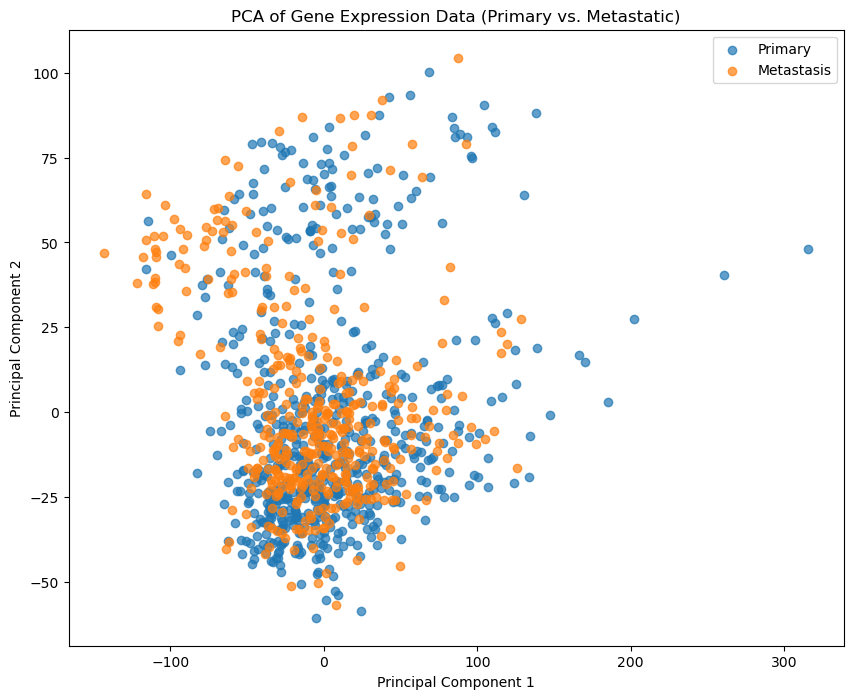

In [56]:

merged_data = pd.merge(expression_data, metadata, on="DEPMAP_ID", how="inner")
primary_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Primary']
metastatic_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Metastasis']


primary_data = primary_samples.select_dtypes(include=['float64', 'int64']).copy()
metastatic_data = metastatic_samples.select_dtypes(include=['float64', 'int64']).copy()


pca_data = pd.concat([primary_data, metastatic_data], axis=0)


threshold = len(pca_data) * 0.5  # 50% of the number of rows
pca_data_cleaned = pca_data.dropna(thresh=threshold, axis=1)

imputer = SimpleImputer(strategy='mean')
pca_data_imputed = imputer.fit_transform(pca_data_cleaned)

pca_data_imputed_df = pd.DataFrame(pca_data_imputed, index=pca_data_cleaned.index, columns=pca_data_cleaned.columns)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data_imputed_df)

scaled_data_df = pd.DataFrame(scaled_data, index=pca_data_imputed_df.index, columns=pca_data_imputed_df.columns)

pca = PCA(n_components=2)  
principal_components = pca.fit_transform(scaled_data_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['PRIMARY_OR_METASTASIS'] = ['Primary'] * len(primary_samples) + ['Metastasis'] * len(metastatic_samples)
pca_df['PRIMARY_OR_METASTASIS'] = pca_df['PRIMARY_OR_METASTASIS'][:len(scaled_data_df)]  # Ensure correct length

plt.figure(figsize=(10, 8))
for cancer_type in pca_df['PRIMARY_OR_METASTASIS'].unique():
    subset = pca_df[pca_df['PRIMARY_OR_METASTASIS'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data (Primary vs. Metastatic)')
plt.legend()
plt.show()

In [57]:
print(metadata['PRIMARY_OR_METASTASIS'])

0       Metastasis
1          Primary
2              NaN
3              NaN
4              NaN
           ...    
1824           NaN
1825    Metastasis
1826       Unknown
1827       Primary
1828    Metastasis
Name: PRIMARY_OR_METASTASIS, Length: 1829, dtype: object


In [58]:
merged_data['PRIMARY_OR_METASTASIS']

0          Primary
1              NaN
2          Primary
3          Primary
4          Primary
           ...    
1388    Metastasis
1389       Primary
1390           NaN
1391           NaN
1392       Primary
Name: PRIMARY_OR_METASTASIS, Length: 1393, dtype: object

In [59]:
primary_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Primary']
metastatic_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Metastasis']

In [60]:
# Drop genes with more than 50% NaN values
threshold = len(merged_data) * 0.5
cleaned_data = merged_data.dropna(thresh=threshold, axis=1)



In [61]:
cleaned_data

,DEPMAP_ID,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1ORF112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),...,SAMPLE_COLLECTION_SITE,PRIMARY_OR_METASTASIS,PRIMARY_DISEASE,SUBTYPE,AGE,SANGER_MODEL_ID,LINEAGE,LINEAGE_SUBTYPE,CULTURE_TYPE,AGE_GROUP
0,ACH-001113,4.990501,0.000000,7.273702,2.765535,4.480265,0.028569,1.269033,3.058316,6.483171,...,lung,Primary,Lung Cancer,"Non-Small Cell Lung Cancer (NSCLC), Squamous C...",69.0,SIDM01226,lung,NSCLC,Adherent,61-70
1,ACH-001289,5.209843,0.545968,7.070604,2.538538,3.510962,0.000000,0.176323,3.836934,4.200850,...,central_nervous_system,NaN,Rhabdoid,Atypical Teratoid Rhabdoid Tumor (ATRT),NaN,NaN,soft_tissue,ATRT,Suspension,NaN
2,ACH-001339,3.779260,0.000000,7.346425,2.339137,4.254745,0.056584,1.339137,6.724241,3.671293,...,skin,Primary,Skin Cancer,Melanoma,14.0,SIDM00514,skin,melanoma,Adherent,11-20
3,ACH-001538,5.726831,0.000000,7.086189,2.543496,3.102658,0.000000,5.914565,6.099716,4.475733,...,biliary_tract,Primary,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",58.0,NaN,bile_duct,cholangiocarcinoma,Adherent,51-60
4,ACH-000242,7.465648,0.000000,6.435462,2.414136,3.864929,0.831877,7.198003,5.452530,7.112492,...,urinary_tract,Primary,Bladder Cancer,Transitional Cell Carcinoma,63.0,SIDM01085,urinary_tract,bladder_carcinoma,Adherent,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,ACH-000750,4.173127,0.000000,6.400879,1.807355,3.303050,0.014355,0.137504,4.944858,4.528571,...,lymph_node,Metastasis,Skin Cancer,Melanoma,58.0,SIDM00149,skin,melanoma,NaN,51-60
1389,ACH-000285,0.097611,0.000000,6.428276,3.257011,4.980482,0.411426,0.124328,0.704872,4.829342,...,haematopoietic_and_lymphoid_tissue,Primary,Lymphoma,Diffuse Large B-cell Lymphoma (DLBCL),NaN,NaN,lymphocyte,non_hodgkin_lymphoma,Suspension,NaN
1390,ACH-001858,5.045268,0.000000,6.991749,1.807355,3.270529,0.028569,3.333424,6.819796,5.395063,...,biliary_tract,NaN,Bile Duct Cancer,"Cholangiocarcinoma, intrahepatic",NaN,SIDM00275,bile_duct,cholangiocarcinoma,Adherent,NaN
1391,ACH-001997,5.805292,0.000000,7.792855,2.482848,3.903038,0.028569,4.124328,6.816600,4.458119,...,biliary_tract,NaN,Bile Duct Cancer,"Cholangiocarcinoma, extrahepatic",NaN,NaN,bile_duct,cholangiocarcinoma,Adherent,NaN


###### 

In [62]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


In [63]:

merged_data = pd.merge(expression_data, metadata, on="DEPMAP_ID", how="inner")

In [64]:
primary_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Primary']
metastatic_samples = merged_data[merged_data['PRIMARY_OR_METASTASIS'] == 'Metastasis']

In [65]:

primary_data = primary_samples.select_dtypes(include=['float64', 'int64']).copy()
metastatic_data = metastatic_samples.select_dtypes(include=['float64', 'int64']).copy()

pca_data = pd.concat([primary_data, metastatic_data], axis=0)

In [66]:
threshold = len(pca_data) * 0.5  # 50% of the number of rows
pca_data_cleaned = pca_data.dropna(thresh=threshold, axis=1)

In [67]:
imputer = SimpleImputer(strategy='mean')
pca_data_imputed = imputer.fit_transform(pca_data_cleaned)

pca_data_imputed_df = pd.DataFrame(pca_data_imputed, index=pca_data_cleaned.index, columns=pca_data_cleaned.columns)

In [68]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data_imputed_df)

scaled_data_df = pd.DataFrame(scaled_data, index=pca_data_imputed_df.index, columns=pca_data_imputed_df.columns)

In [69]:
pca = PCA(n_components=2)  # Choosing 2 components for a 2D plot
principal_components = pca.fit_transform(scaled_data_df)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['PRIMARY_OR_METASTASIS'] = ['Primary'] * len(primary_samples) + ['Metastasis'] * len(metastatic_samples)
pca_df['PRIMARY_OR_METASTASIS'] = pca_df['PRIMARY_OR_METASTASIS'][:len(scaled_data)]  # Ensure correct length

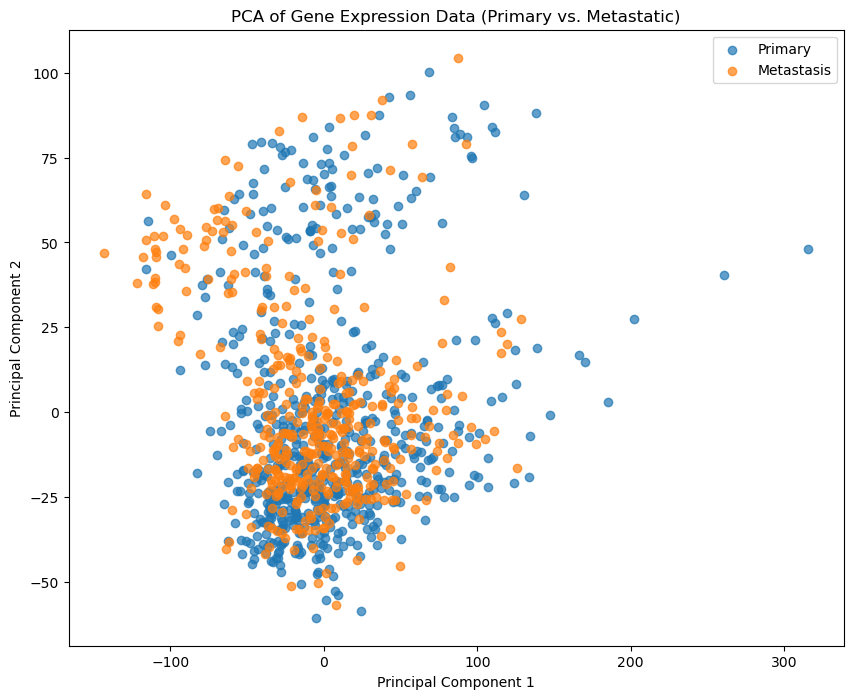

In [70]:
plt.figure(figsize=(10, 8))
for cancer_type in pca_df['PRIMARY_OR_METASTASIS'].unique():
    subset = pca_df[pca_df['PRIMARY_OR_METASTASIS'] == cancer_type]
    plt.scatter(subset['PC1'], subset['PC2'], label=cancer_type, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data (Primary vs. Metastatic)')
plt.legend()
plt.show()

In [71]:
import pandas as pd


gene_expression_data = pd.read_csv("CCLE_expression.csv", index_col=0) 

print(metadata.head())
print(gene_expression_data.head())

    DEPMAP_ID CELL_LINE_NAME STRIPPED_CELL_LINE_NAME  \
0  ACH-000001    NIH:OVCAR-3               NIHOVCAR3   
1  ACH-000002          HL-60                    HL60   
2  ACH-000003          CACO2                   CACO2   
3  ACH-000004            HEL                     HEL   
4  ACH-000005     HEL 92.1.7                 HEL9217   

                                    CCLE_NAME          ALIAS  COSMICID  \
0                             NIHOVCAR3_OVARY         OVCAR3  905933.0   
1     HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN  905938.0   
2                       CACO2_LARGE_INTESTINE  CACO2, CaCo-2       NaN   
3      HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN  907053.0   
4  HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN       NaN   

      SEX SOURCE       RRID  WTSI_MASTER_CELL_ID  ...  \
0  Female   ATCC  CVCL_0465               2201.0  ...   
1  Female   ATCC  CVCL_0002                 55.0  ...   
2    Male   ATCC  CVCL_0025                  Na

In [72]:
merged = pd.merge(gene_expression_data, metadata, left_index=True, right_on="DEPMAP_ID", how="inner")

primary_samples = merged[merged['PRIMARY_OR_METASTASIS'] == 'Primary']
metastatic_samples = merged[merged['PRIMARY_OR_METASTASIS'] == 'Metastasis']

print("Primary samples shape:", primary_samples.shape)
print("Metastatic samples shape:", metastatic_samples.shape)

Primary samples shape: (626, 19200)
Metastatic samples shape: (416, 19200)


In [73]:
from scipy.stats import ttest_ind
import numpy as np

logFC = []
p_values = []

# Calculating log2 fold change and p-values for each gene
for gene in gene_expression_data.columns:
    control = primary_samples[gene].dropna()  # Primary samples for this gene
    treatment = metastatic_samples[gene].dropna()  # Metastatic samples for this gene
    
    if len(control) > 1 and len(treatment) > 1:  # Ensure enough samples for t-test
        stat, p_value = ttest_ind(control, treatment)
        logFC_value = np.log2(treatment.mean() / control.mean()) if control.mean() > 0 else np.nan
        
        logFC.append(logFC_value)
        p_values.append(p_value)
    else:
        logFC.append(np.nan)
        p_values.append(np.nan)

results = pd.DataFrame({
    'gene': gene_expression_data.columns,
    'logFC': logFC,
    'pvalue': p_values
})

C:\Users\dimim\AppData\Local\Temp\ipykernel_17504\3983108969.py:14: RuntimeWarning: divide by zero encountered in log2
  logFC_value = np.log2(treatment.mean() / control.mean()) if control.mean() > 0 else np.nan


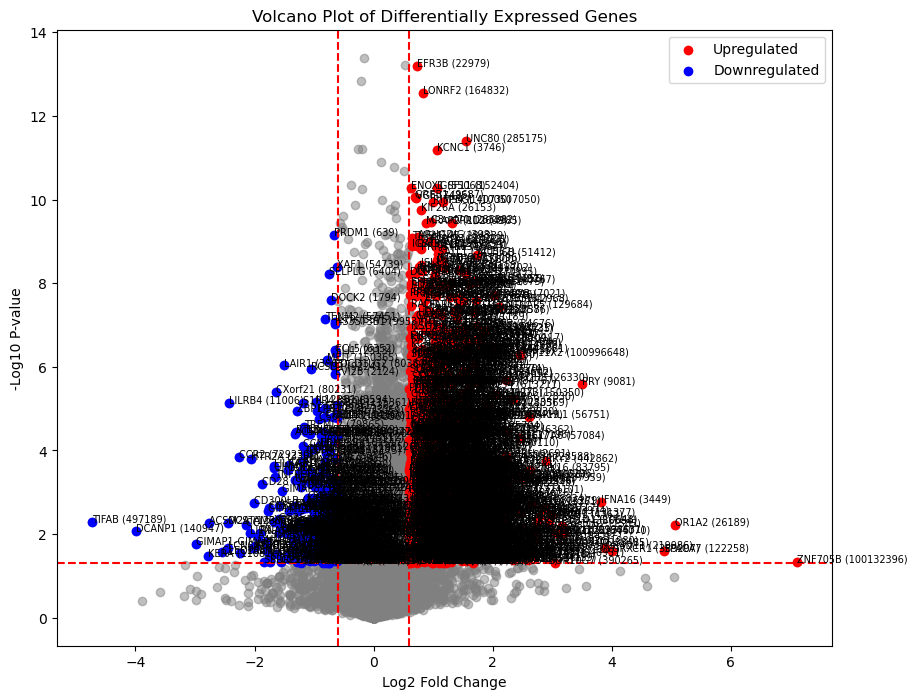

In [74]:
import matplotlib.pyplot as plt

# Calculating -log10(p-value)
results['negLogPval'] = -np.log10(results['pvalue'])

# Define thresholds for significance
logFC_threshold = 0.6  
pval_threshold = 0.05

# Column for differential expression status
results['diffexpressed'] = 'NO'
results.loc[(results['logFC'] > logFC_threshold) & (results['pvalue'] < pval_threshold), 'diffexpressed'] = 'UP'
results.loc[(results['logFC'] < -logFC_threshold) & (results['pvalue'] < pval_threshold), 'diffexpressed'] = 'DOWN'

# Volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(results['logFC'], results['negLogPval'], color='grey', alpha=0.5)

# Highlighting differentially expressed genes
upregulated = results[results['diffexpressed'] == 'UP']
downregulated = results[results['diffexpressed'] == 'DOWN']
plt.scatter(upregulated['logFC'], upregulated['negLogPval'], color='red', label='Upregulated')
plt.scatter(downregulated['logFC'], downregulated['negLogPval'], color='blue', label='Downregulated')

# Threshold lines
plt.axhline(y=-np.log10(pval_threshold), color='red', linestyle='--')
plt.axvline(x=logFC_threshold, color='red', linestyle='--')
plt.axvline(x=-logFC_threshold, color='red', linestyle='--')


plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')
plt.legend()

for i in range(len(results)):
    if results['diffexpressed'][i] != 'NO':
        plt.text(results['logFC'][i], results['negLogPval'][i], results['gene'][i], fontsize=7)
plt.savefig('volcano.pdf')
plt.show()

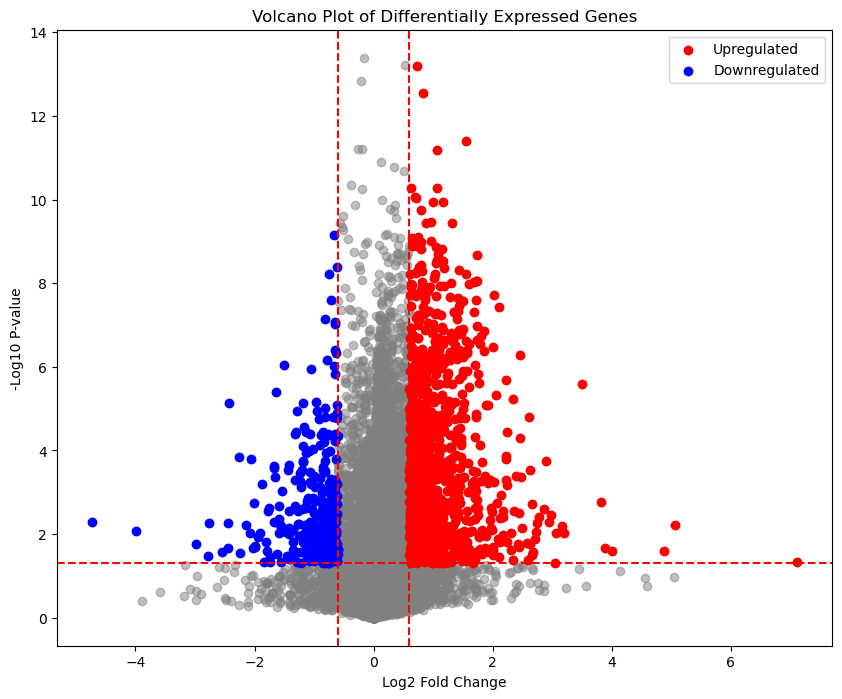

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating -log10(p-value)
results['negLogPval'] = -np.log10(results['pvalue'])

# Define thresholds for significance
logFC_threshold = 0.6  
pval_threshold = 0.05

# Column for differential expression status
results['diffexpressed'] = 'NO'
results.loc[(results['logFC'] > logFC_threshold) & (results['pvalue'] < pval_threshold), 'diffexpressed'] = 'UP'
results.loc[(results['logFC'] < -logFC_threshold) & (results['pvalue'] < pval_threshold), 'diffexpressed'] = 'DOWN'

# Volcano plot
plt.figure(figsize=(10, 8))
plt.scatter(results['logFC'], results['negLogPval'], color='grey', alpha=0.5)

# Highlighting differentially expressed genes
upregulated = results[results['diffexpressed'] == 'UP']
downregulated = results[results['diffexpressed'] == 'DOWN']
plt.scatter(upregulated['logFC'], upregulated['negLogPval'], color='red', label='Upregulated')
plt.scatter(downregulated['logFC'], downregulated['negLogPval'], color='blue', label='Downregulated')

# Threshold lines
plt.axhline(y=-np.log10(pval_threshold), color='red', linestyle='--')
plt.axvline(x=logFC_threshold, color='red', linestyle='--')
plt.axvline(x=-logFC_threshold, color='red', linestyle='--')


plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')
plt.legend()

plt.savefig('volcano.pdf')
plt.show()

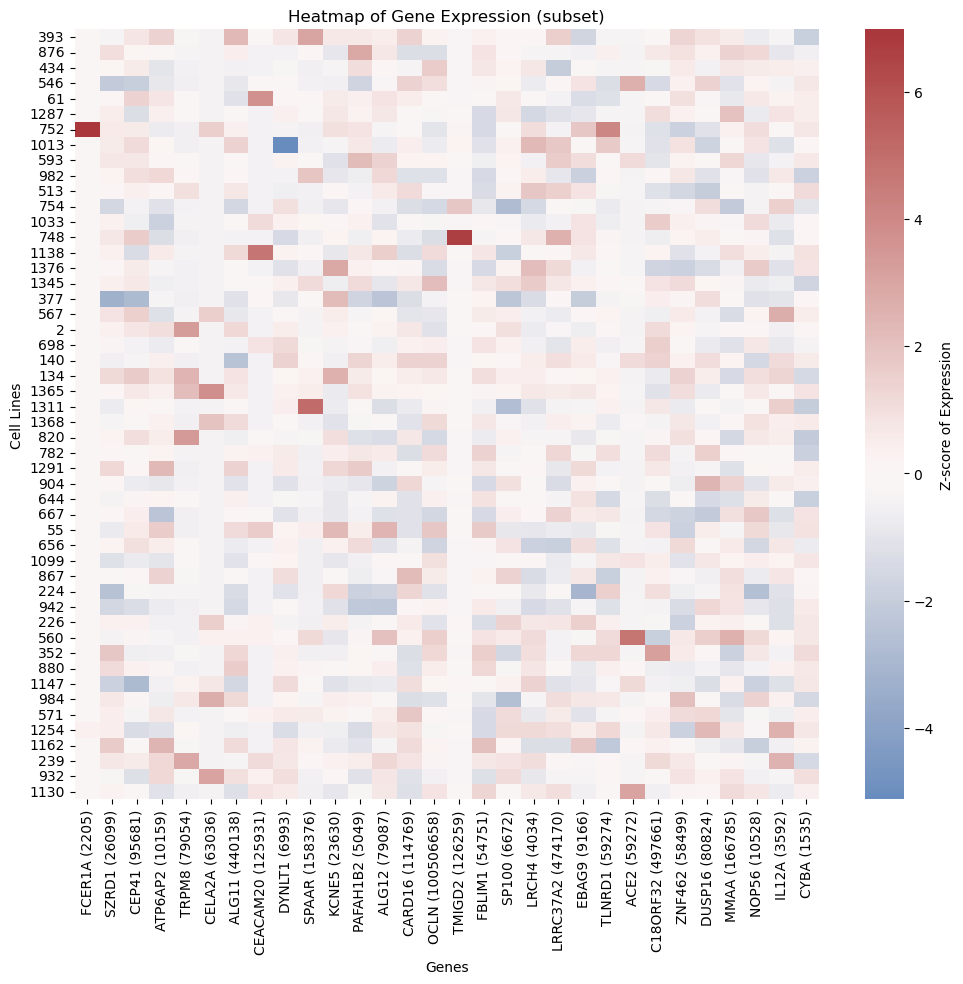

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


subset_expression_data = expression_data.sample(n=50, axis=0).sample(n=30, axis=1)  # Adjust numbers as needed

standardized_data = subset_expression_data.apply(zscore)

plt.figure(figsize=(12, 10))
sns.heatmap(standardized_data, cmap='vlag', center=0, cbar_kws={'label': 'Z-score of Expression'})
plt.title('Heatmap of Gene Expression (subset)')
plt.xlabel('Genes')
plt.ylabel('Cell Lines')
plt.show()


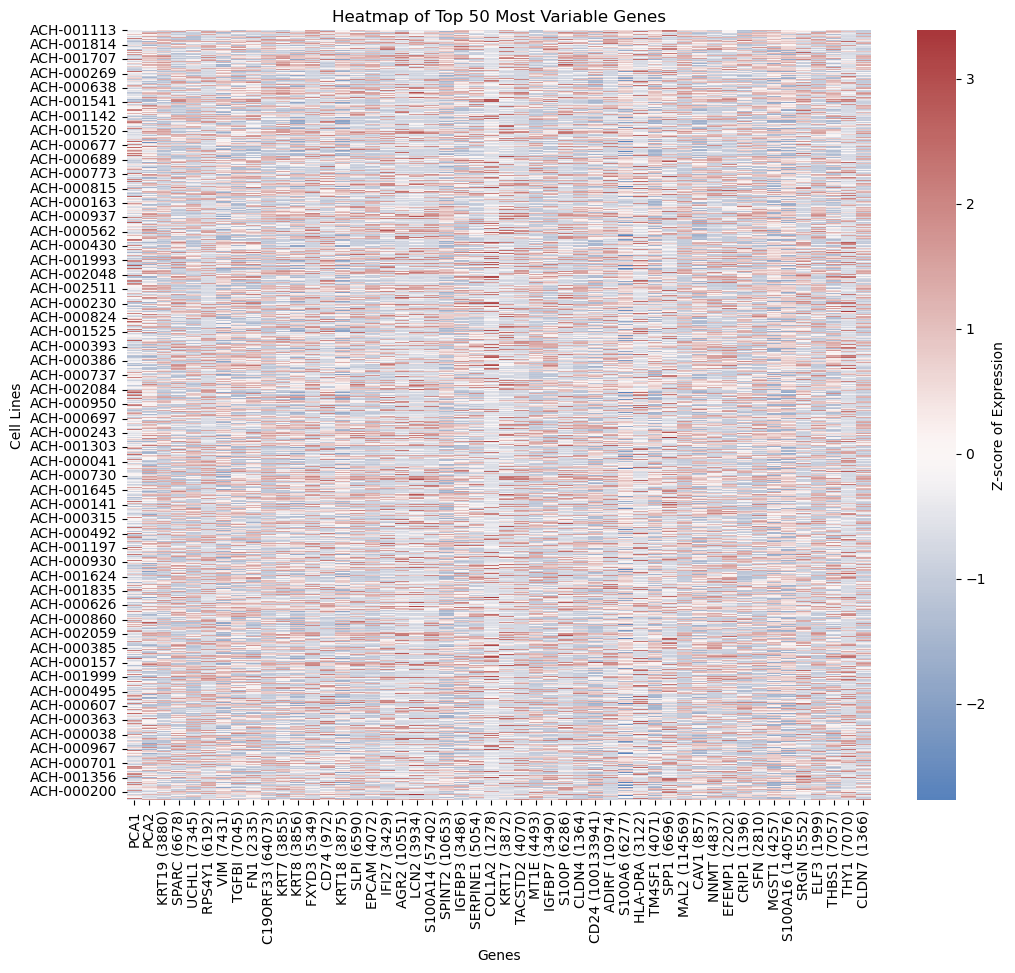

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

expression_data.set_index(expression_data.columns[0], inplace=True)

expression_values = expression_data.select_dtypes(include='number')

gene_variances = expression_values.var(axis=0)

# Most variable genes
top_genes = gene_variances.nlargest(50).index
top_expression_data = expression_values[top_genes]

standardized_top_expression_data = top_expression_data.apply(zscore)

plt.figure(figsize=(12, 10))
sns.heatmap(standardized_top_expression_data, cmap='vlag', center=0, cbar_kws={'label': 'Z-score of Expression'})
plt.title('Heatmap of Top 50 Most Variable Genes')
plt.xlabel('Genes')
plt.ylabel('Cell Lines')
plt.show()
